# Classifying characters in scikit-learn

#### Classifying handwritten digits

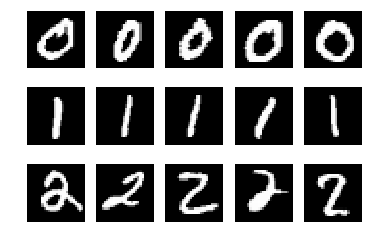

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm

mnist = fetch_mldata('MNIST original', data_home='data/mnist')

counter = 1
for i in range(1, 4):
    for j in range(1, 6):
        plt.subplot(3, 5, counter)
        plt.imshow(mnist.data[(i - 1) * 8000 + j].reshape((28, 28)), cmap=cm.Greys_r)
        plt.axis('off')
        counter += 1
plt.show()

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

if __name__ == '__main__':
    X, y = mnist.data, mnist.target
    X = X/255.0*2 - 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
    
    pipeline = Pipeline([
        ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
    ])
    
    parameters = {
        'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
        'clf__C': (0.1, 0.3, 1, 3, 10, 30),
    }

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
    grid_search.fit(X_train[:10000], y_train[:10000])
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
    predictions = grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

E:\Anc\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anc\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 50.6min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 99.1min finished


Best score: 0.963
Best parameters set:
	clf__C: 10
	clf__gamma: 0.01
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      1697
        1.0       0.99      0.98      0.98      2045
        2.0       0.95      0.98      0.96      1743
        3.0       0.96      0.96      0.96      1835
        4.0       0.96      0.97      0.97      1693
        5.0       0.97      0.96      0.97      1564
        6.0       0.98      0.99      0.98      1683
        7.0       0.98      0.97      0.97      1807
        8.0       0.97      0.96      0.96      1692
        9.0       0.97      0.95      0.96      1741

avg / total       0.97      0.97      0.97     17500



#### Classifying characters in natural images

In [4]:
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from PIL import Image

X = []
y = []
for path, subdirs, files in os.walk('data/English/Img/GoodImg/Bmp/'):
    for filename in files:
        f = os.path.join(path, filename)
        target = filename[3:filename.index('-')]
        img = Image.open(f).convert('L').resize((30, 30), resample=Image.LANCZOS)
        X.append(np.array(img).reshape(900,))
        y.append(target)
X = np.array(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=11)
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])
parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

if __name__ == '__main__':
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 30.6min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 61.9min finished


Best score: 0.074
Best parameters set:
	clf__C: 1
	clf__gamma: 0.01
             precision    recall  f1-score   support

        001       0.00      0.00      0.00        13
        002       0.00      0.00      0.00         8
        003       0.00      0.00      0.00        11
        004       0.00      0.00      0.00         4
        005       0.00      0.00      0.00         7
        006       0.00      0.00      0.00         6
        007       0.00      0.00      0.00         6
        008       0.00      0.00      0.00         3
        010       0.00      0.00      0.00         2
        011       0.07      1.00      0.12        51
        012       0.00      0.00      0.00        13
        013       0.00      0.00      0.00        21
        014       0.00      0.00      0.00        21
        015       0.00      0.00      0.00        44
        016       0.00      0.00      0.00         6
        017       0.00      0.00      0.00        14
        018       0.00      0.